In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import pearsonr

In [4]:
print(os.getcwd())

D:\PESU\Sem 5\Data Analytics\DataAnalytics


In [5]:
path = os.getcwd() + "\Datasets\\"
print(os.listdir())
df = pd.read_csv("Indicator.csv")
df.head()

['.git', '.ipynb_checkpoints', 'Datasets', 'IncomeShareAndGDP.ipynb', 'Indicator.csv', 'Pop_Growth.ipynb', 'README.md', 'Unemployment.ipynb']


,Indicator_Code,Indicator_Name
0,SP.POP.GROW,Population Growth (in %)
1,SI.POV.GINI,Gini Index
2,NY.GDP.PCAP.KD.ZG,GDP per capita growth (in %)
3,SE.XPD.TOTL.GB.ZS,"Government expenditure on education, total (% ..."
4,SE.XPD.TOTL.GD.ZS,"Government expenditure on education, total (% ..."


### To access the dataset(s) for any indicator(s), do the following:
- Find out the corresponding Inidcator_Code using Indicator.csv
- That code becomes the name of the folder to access as ```newPath = path + "\\<Indicator_Code>"```
- Each indicator folder has two csvs having the metadata and the main csv file containing the data. This file begins with "API_.... .csv"
- The main csv is the first element to be listed in os.listdir
- Run: ```df = pd.read_csv(newPath + os.listdir(newPath)[0])```

In [6]:
indicator_csvs = [path + i for i in df.Indicator_Code]
df1 = ["\\".join(i.split("\\")) for i in indicator_csvs]
#print(df1)
#To get the population growth CSV
pop_grow = pd.read_csv(df1[0] + "\\" + os.listdir(df1[0])[0])#, sep='delimiter',header=None)#, error_bad_lines=False)

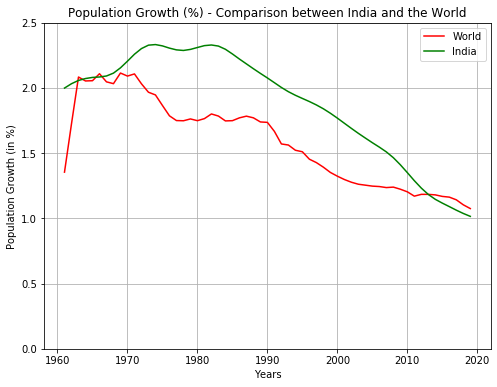

In [7]:
worldPop = pop_grow[pop_grow["Country Name"]=="World"]
indiaPopn = pop_grow[pop_grow["Country Name"]=="India"]
growthWorld = {}
growthIndia = {}

k = 5
for i in worldPop.iloc[:,5:]:
    growthWorld[int(i)] = worldPop.iloc[0,k]
    growthIndia[int(i)] = indiaPopn.iloc[0,k]
    k+=1

plt.figure(figsize=(8,6))
plt.grid(True)
plt.title("Population Growth (%) - Comparison between India and the World")
plt.xlabel("Years")
plt.ylabel("Population Growth (in %)")
plt.ylim(0,2.5)
plt.plot(np.array(list(growthWorld.keys())),np.array(list(growthWorld.values())),color="red")
plt.plot(np.array(list(growthIndia.keys())),np.array(list(growthIndia.values())),color="green")
plt.legend(["World","India"])
plt.show()

With the above graph, we can see that the population growth of the world saw a sharp increase in the 1960s, and maintained it until mid 1970s after which there is a gradual decline. India's growth however, rose gradually upto the mid 1980s, following which there is a steeper decline than that of the world, with India's relative population growth being lesser than that of the world from the early 2010s. In order to find out the causes of this, the crude birth and death rates (per 1000 people) were considered. 

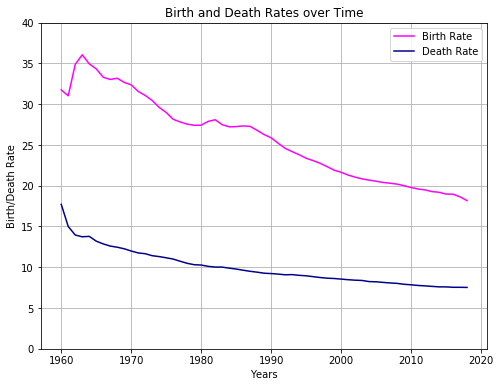

In [8]:
#Using Birth and Death Rates to understand the cause of decline in population growth

birthRateCSVPath = indicator_csvs[-2] + "\\" + os.listdir(indicator_csvs[-2])[0]
birthRate = pd.read_csv(birthRateCSVPath)
birthRateWorld = birthRate[birthRate["Country Name"]=="World"]

deathRateCSVPath = indicator_csvs[-1] + "\\" + os.listdir(indicator_csvs[-1])[0]
deathRate = pd.read_csv(deathRateCSVPath)
deathRateWorld = deathRate[deathRate["Country Name"]=="World"]

deathRateWorld.drop(columns = ["2019"])
birthRateWorld.drop(columns = ["2019"])

br = {}
dr = {}

k = 4
for i in birthRateWorld.iloc[:,4:-1]:
    dr[int(i)] = deathRateWorld.iloc[0,k]
    br[int(i)] = birthRateWorld.iloc[0,k]
    k+=1
    
plt.figure(figsize=(8,6))
plt.grid(True)
plt.title("Birth and Death Rates over Time")
plt.xlabel("Years")
plt.ylabel("Birth/Death Rate")
plt.ylim(0,40)
plt.plot(np.array(list(br.keys())),np.array(list(br.values())),color="magenta")
plt.plot(np.array(list(dr.keys())),np.array(list(dr.values())),color="darkblue")
plt.legend(["Birth Rate","Death Rate"])
plt.show()

Here, we can see that the birth and death rates of the World have been on a steady decline since the 1960s. However, from a layman's perspective, it can be inferred that the birth rate has been decreasing more sharply when compare to the death rate. This may be a significant reason for the decline in population growth.

Birth Rate: 
Mean : 25.75258029728814 	Standard Deviaiton : 5.096091176811446


Death Rate: 
Mean : 9.965490350389832 	Standard Deviaiton : 2.1628107920405575


Coefficient of Correlation, R = 0.907155244452341


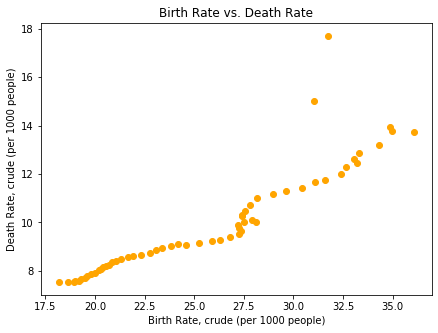

In [9]:
brMean = np.mean(list(br.values()))
brStdDev = np.std(list(br.values()))

print("Birth Rate: \nMean :",brMean,"\tStandard Deviaiton :",brStdDev)

drMean = np.mean(list(dr.values()))
drStdDev = np.std(list(dr.values()))

print("\n\nDeath Rate: \nMean :",drMean,"\tStandard Deviaiton :",drStdDev)

coVariance = np.cov(list(br.values()),list(dr.values()))
coeffCorrelation = pearsonr(list(br.values()),list(dr.values()))
print("\n\nCoefficient of Correlation, R =",coeffCorrelation[0])


plt.figure(figsize=(7,5))
#plt.grid(True)
plt.scatter(list(br.values()),list(dr.values()),color = "orange")
#plt.yticks(np.arange(min(dr), max(dr)+10, 10))
#plt.xticks(np.arange(min(br), max(br)+10, 10))
plt.xlabel("Birth Rate, crude (per 1000 people)")
plt.ylabel("Death Rate, crude (per 1000 people)")
plt.title("Birth Rate vs. Death Rate")
plt.show()

Coefficient of Correlation, R = 0.9524662046982475


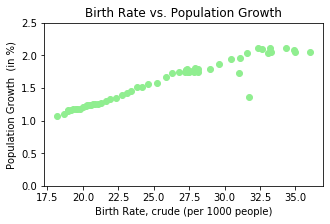

In [10]:
coeffCorrelation = pearsonr(list(br.values()),list(growthWorld.values()))
print("Coefficient of Correlation, R =",coeffCorrelation[0])


plt.figure(figsize=(5,3))
#plt.grid(True)
plt.scatter(list(br.values()),list(growthWorld.values()),color = "lightgreen")
plt.ylim(0,2.5)
#plt.yticks(np.arange(min(dr), max(dr)+10, 10))
#plt.xticks(np.arange(min(br), max(br)+10, 10))
plt.xlabel("Birth Rate, crude (per 1000 people)")
plt.ylabel("Population Growth  (in %)")
plt.title("Birth Rate vs. Population Growth")
plt.show()

Coefficient of Correlation, R = 0.7451621199422344


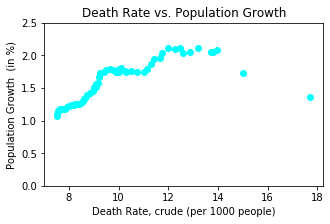

In [11]:
coeffCorrelation = pearsonr(list(dr.values()),list(growthWorld.values()))
print("Coefficient of Correlation, R =",coeffCorrelation[0])


plt.figure(figsize=(5,3))
#plt.grid(True)
plt.scatter(list(dr.values()),list(growthWorld.values()),color = "cyan")
plt.ylim(0,2.5)
#plt.yticks(np.arange(min(dr), max(dr)+10, 10))
#plt.xticks(np.arange(min(br), max(br)+10, 10))
plt.xlabel("Death Rate, crude (per 1000 people)")
plt.ylabel("Population Growth  (in %)")
plt.title("Death Rate vs. Population Growth")
plt.show()